In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os, json
import pandas as pd
import numpy as np
import seaborn as sns

def get_task_ranking(dict, ranking_type, task):
    representations_seen = 0
    index = 0
    for i in range(0,len(dict["ranking"])):
        if dict["ranking"][i]["category"] == "rankingRepresentation":
            representations_seen +=1
            if task == dict["treatmentOrder"][representations_seen]+1:
                index = i
                break
    if ranking_type <= 3:
        ranking = dict["ranking"][index]["ranking"]
    if ranking_type >3:
        ranking = []
        for tuple in dict["ranking"][index]["ranking"]:
            ranking.append(tuple[0])
            ranking.append(tuple[1])
    return ranking

def get_task_actions(dict, task):
    representations_seen = 0
    start_index = 0
    found_start = False
    end_index = 0
    for i in range(0,len(dict["ranking"])):
        if dict["ranking"][i]["category"] == "rankingRepresentation":
            representations_seen +=1
            if task == dict["treatmentOrder"][representations_seen]+1 and not found_start:
                start_index = i + 1
                found_start = True
                if task == 3:
                    end_index = len(dict["ranking"])-2
                    break
            if task + 1 == dict["treatmentOrder"][representations_seen]+1 and found_start:
                end_index = i
                break
    actions = []
    for i in range(start_index, end_index):
        actions.append(dict["ranking"][i])
    return actions

def get_task_choices(dict, ranking_type, task):
    actions = get_task_actions(dict, task)
    ranking = get_task_ranking(dict, ranking_type, task)
    selected_ids = []
    for action in actions:
        if action["eventName"] == "select":
            selected_ids.append(action["itemID"])
        if action["eventName"] == "unselect":
            selected_ids.remove(action["itemID"])
        if action["eventName"] == "fourthElementSelected":
            selected_ids.remove(action["itemID"])
    choices = []
    for id in selected_ids:
        for cand in ranking:
            if id == cand["id"]:
                choices.append(cand)
    return choices

def get_survey_answers(dict):
    survey = dict["survey"]
    answers = []
    for entry in survey:
        if entry["category"] == "surveyQuestionAnswers":
            answers.append(entry)
    return answers

def get_briefing_duration(dict):
    start = dict["briefing"][0]["timeOfEvent"]
    end = dict["briefing"][len(dict["briefing"])-1]["timeOfEvent"]
    return end-start

def get_task_time(dict, task):
    representations_seen = 0
    start_time = 0
    found_start = False
    end_time = 0
    for i in range(0,len(dict["ranking"])):
        if dict["ranking"][i]["category"] == "loadNewRankingType":
            representations_seen +=1
            if task == dict["treatmentOrder"][representations_seen]+1 and not found_start:
                start_time = dict["ranking"][i]["timeOfEvent"]
                found_start = True
                if task == 3:
                    end_time = dict["ranking"][len(dict["ranking"])-1]["timeOfEvent"]
                    break
            if task + 1 == dict["treatmentOrder"][representations_seen]+1 and found_start:
                end_time = dict["ranking"][i]["timeOfEvent"]
                break
    return end_time - start_time

def get_survey_duration(dict):
    start_survey = dict["survey"][0]["timeOfEvent"]
    end_survey = dict["survey"][len(dict["survey"])-3]["timeOfEvent"]
    return end_survey-start_survey

def get_data():
    cols = ['uID', 'ranking_type','briefing','task_1_ranking', 'task_2_ranking', 'task_3_ranking',
               'task_1_actions','task_2_actions','task_3_actions','choices_task_1','choices_task_2','choices_task_3','survey_answers',
               'time_briefing','time_task_1','time_task_2','time_task_3','time_survey']
    path_to_jsonfiles = "./jsonFiles_valid"
    alldicts = []
    col_uID = []
    col_ranking_type = []
    col_briefing = []
    col_task_1_ranking = []
    col_task_2_ranking = []
    col_task_3_ranking = []
    col_task_1_actions = []
    col_task_2_actions = []
    col_task_3_actions = []
    col_task_1_choices = []
    col_task_2_choices = []
    col_task_3_choices = []
    col_survey_answers = []
    col_time_briefing = []
    col_time_task_1 = []
    col_time_task_2 = []
    col_time_task_3 = []
    col_time_survey = []
    for file in os.listdir(path_to_jsonfiles):
        full_filename = "%s/%s" % (path_to_jsonfiles, file)
        with open(full_filename,'r') as fi:
            dict = json.load(fi)
            uID = file[0:len(file)-5]
            col_uID.append(uID)
        
            briefing = dict["briefing"]
            col_briefing.append(briefing)
        
            ranking_type = int(dict["ranking"][0]["itemID"])
            col_ranking_type.append(ranking_type)
        
            task_1_ranking = get_task_ranking(dict, ranking_type, 1)
            task_2_ranking = get_task_ranking(dict, ranking_type, 2)
            task_3_ranking = get_task_ranking(dict, ranking_type, 3)
        
            col_task_1_ranking.append(task_1_ranking)
            col_task_2_ranking.append(task_2_ranking)
            col_task_3_ranking.append(task_3_ranking)
        
            task_1_actions = get_task_actions(dict, 1)
            task_2_actions = get_task_actions(dict, 2)
            task_3_actions = get_task_actions(dict, 3)
            col_task_1_actions.append(task_1_actions)
            col_task_2_actions.append(task_2_actions)
            col_task_3_actions.append(task_3_actions)
        
            choices_task_1 = get_task_choices(dict, ranking_type, 1)
            choices_task_2 = get_task_choices(dict, ranking_type, 2)
            choices_task_3 = get_task_choices(dict, ranking_type, 3)
            col_task_1_choices.append(choices_task_1)
            col_task_2_choices.append(choices_task_2)
            col_task_3_choices.append(choices_task_3)
        
            survey_answers = get_survey_answers(dict)
            col_survey_answers.append(survey_answers)
        
            time_briefing = get_briefing_duration(dict)
            col_time_briefing.append(time_briefing)
        
            time_task_1 = get_task_time(dict, 1)
            time_task_2 = get_task_time(dict, 2)
            time_task_3 = get_task_time(dict, 3)
            col_time_task_1.append(time_task_1)
            col_time_task_2.append(time_task_2)
            col_time_task_3.append(time_task_3)
        
            time_survey = get_survey_duration(dict)
            col_time_survey.append(time_survey)
    allArray = [col_uID,col_ranking_type,col_briefing,col_task_1_ranking,col_task_2_ranking,col_task_3_ranking,col_task_1_actions,
               col_task_2_actions,col_task_3_actions,col_task_1_choices,col_task_2_choices,col_task_3_choices,col_survey_answers,
               col_time_briefing,col_time_task_1,col_time_task_2,col_time_task_3,col_time_survey]
    selected = []
    for i in range(0,len(col_uID)):
            cand = []
            for j in range(0,len(allArray)):
                cand.append(allArray[j][i])
            selected.append(cand)
    data_table = pd.DataFrame(np.array(selected), columns=cols)
    return data_table

def get_ranking_with_selected_count_by_rank_and_ranking_type(ranking_type):
    distribution_by_task = {}
    
    female_candidates_seen_at_all_positions_task_1 = [0] * 20
    male_candidates_seen_at_all_positions_task_1 = [0] * 20
    female_candidates_selected_at_all_positions_task_1 = [0] * 20
    male_candidates_selected_at_all_positions_task_1 = [0] * 20
    data_task_1 = get_data()
    data_task_1 = data_task_1[(data_task_1['ranking_type'] == ranking_type)]
    ranking_task_1 = data_task_1['task_1_ranking']
    selections_task_1 = data_task_1["choices_task_1"]
    for exp in ranking_task_1:
        for cand in exp:
            if cand["gender"] == "f":
                rank = cand["rank"] - 1
                female_candidates_seen_at_all_positions_task_1[rank]+=1
            else:
                rank = cand["rank"] - 1
                male_candidates_seen_at_all_positions_task_1[rank]+=1
    for exp in selections_task_1:
        for cand in exp:
            if cand["gender"] == "f":
                rank = cand["rank"] - 1
                female_candidates_selected_at_all_positions_task_1[rank]+=1
            else:
                rank = cand["rank"] - 1
                male_candidates_selected_at_all_positions_task_1[rank]+=1
    
    female_candidates_seen_at_all_positions_task_2 = [0] * 20
    male_candidates_seen_at_all_positions_task_2 = [0] * 20
    female_candidates_selected_at_all_positions_task_2 = [0] * 20
    male_candidates_selected_at_all_positions_task_2 = [0] * 20
    data_task_2 = get_data()
    data_task_2 = data_task_2[(data_task_2['ranking_type'] == ranking_type)]
    ranking_task_2 = data_task_2['task_2_ranking']
    selections_task_2 = data_task_2["choices_task_2"]
    for exp in ranking_task_2:
        for cand in exp:
            if cand["gender"] == "f":
                rank = cand["rank"] - 1
                female_candidates_seen_at_all_positions_task_2[rank]+=1
            else:
                rank = cand["rank"] - 1
                male_candidates_seen_at_all_positions_task_2[rank]+=1
    for exp in selections_task_2:
        for cand in exp:
            if cand["gender"] == "f":
                rank = cand["rank"] - 1
                female_candidates_selected_at_all_positions_task_2[rank]+=1
            else:
                rank = cand["rank"] - 1
                male_candidates_selected_at_all_positions_task_2[rank]+=1
                
    female_candidates_seen_at_all_positions_task_3 = [0] * 20
    male_candidates_seen_at_all_positions_task_3 = [0] * 20
    female_candidates_selected_at_all_positions_task_3 = [0] * 20
    male_candidates_selected_at_all_positions_task_3 = [0] * 20
    data_task_3 = get_data()
    data_task_3 = data_task_3[(data_task_3['ranking_type'] == ranking_type)]
    ranking_task_3 = data_task_3['task_3_ranking']
    selections_task_3 = data_task_3["choices_task_3"]
    for exp in ranking_task_3:
        for cand in exp:
            if cand["gender"] == "f":
                rank = cand["rank"] - 1
                female_candidates_seen_at_all_positions_task_3[rank]+=1
            else:
                rank = cand["rank"] - 1
                male_candidates_seen_at_all_positions_task_3[rank]+=1
    for exp in selections_task_3:
        for cand in exp:
            if cand["gender"] == "f":
                rank = cand["rank"] - 1
                female_candidates_selected_at_all_positions_task_3[rank]+=1
            else:
                rank = cand["rank"] - 1
                male_candidates_selected_at_all_positions_task_3[rank]+=1
    
    distribution_by_task["1"] = {}
    distribution_by_task["1"]["female"] = {}
    distribution_by_task["1"]["male"] = {}
    distribution_by_task["1"]["female"]["seen"] = female_candidates_seen_at_all_positions_task_1
    distribution_by_task["1"]["female"]["selected"] = female_candidates_selected_at_all_positions_task_1
    distribution_by_task["1"]["male"]["seen"] = male_candidates_seen_at_all_positions_task_1
    distribution_by_task["1"]["male"]["selected"] = male_candidates_selected_at_all_positions_task_1
    
    distribution_by_task["2"] = {}
    distribution_by_task["2"]["female"] = {}
    distribution_by_task["2"]["male"] = {}
    distribution_by_task["2"]["female"]["seen"] = female_candidates_seen_at_all_positions_task_2
    distribution_by_task["2"]["female"]["selected"] = female_candidates_selected_at_all_positions_task_2
    distribution_by_task["2"]["male"]["seen"] = male_candidates_seen_at_all_positions_task_2
    distribution_by_task["2"]["male"]["selected"] = male_candidates_selected_at_all_positions_task_2
    
    distribution_by_task["3"] = {}
    distribution_by_task["3"]["female"] = {}
    distribution_by_task["3"]["male"] = {}
    distribution_by_task["3"]["female"]["seen"] = female_candidates_seen_at_all_positions_task_3
    distribution_by_task["3"]["female"]["selected"] = female_candidates_selected_at_all_positions_task_3
    distribution_by_task["3"]["male"]["seen"] = male_candidates_seen_at_all_positions_task_3
    distribution_by_task["3"]["male"]["selected"] = male_candidates_selected_at_all_positions_task_3
    
    return distribution_by_task
        
def get_selected_candidates_experience_gender_rank_task_rankingtype(data_table):
    #gender == 0 ->f
    #gender == 1 ->m
    cols = ['total_xp','furniture_assembly_xp', 'home_repairs_xp', 'rank', 'task_nr', 'ranking_type', 'gender','uId']
    col_total = []
    col_furniture = []
    col_home = []
    col_rank = []
    col_task = []
    col_type = []
    col_gender = []
    col_uID = []
    for i in range(0, len(data_table.index)):
        for cand in data_table.iloc[i][9]:
            col_total.append(cand["totalExp"])
            col_furniture.append(cand["tag1"])
            col_home.append(cand["tag2"])
            col_rank.append(cand["rank"])
            col_task.append(1)
            r_type = data_table.iloc[i][1]
            col_type.append(int(r_type))
            col_uID.append(data_table.iloc[i][0])
            if cand["gender"] == "f":
                col_gender.append(0)
            if cand["gender"] == "m":
                col_gender.append(1)
    for i in range(0, len(data_table.index)):
        for cand in data_table.iloc[i][10]:
            col_total.append(cand["totalExp"])
            col_furniture.append(cand["tag1"])
            col_home.append(cand["tag2"])
            col_rank.append(cand["rank"])
            col_task.append(2)
            r_type = data_table.iloc[i][1]
            col_type.append(int(r_type))
            col_uID.append(data_table.iloc[i][0])
            if cand["gender"] == "f":
                col_gender.append(0)
            if cand["gender"] == "m":
                col_gender.append(1)
    for i in range(0, len(data_table.index)):
        for cand in data_table.iloc[i][11]:
            col_total.append(cand["totalExp"])
            col_furniture.append(cand["tag1"])
            col_home.append(cand["tag2"])
            col_rank.append(cand["rank"])
            col_task.append(3)
            r_type = data_table.iloc[i][1]
            col_type.append(int(r_type))
            col_uID.append(data_table.iloc[i][0])
            if cand["gender"] == "f":
                col_gender.append(0)
            if cand["gender"] == "m":
                col_gender.append(1)
    allArr = [col_total, col_furniture, col_home, col_rank, col_task, col_type, col_gender, col_uID]
    selected = []
    for i in range(0,len(col_total)):
        cand = []
        for j in range(0,len(allArr)):
            cand.append(allArr[j][i])
        selected.append(cand)
    data = data = pd.DataFrame(np.array(selected), columns=cols)
    cols = ['total_xp','furniture_assembly_xp', 'home_repairs_xp', 'rank', 'task_nr', 'ranking_type', 'gender','uId']
    data["total_xp"] = data["total_xp"].astype(float)
    data["furniture_assembly_xp"] = data["furniture_assembly_xp"].astype(float)
    data["home_repairs_xp"] = data["home_repairs_xp"].astype(float)
    data["rank"] = data["rank"].astype(int)
    data["task_nr"] = data["task_nr"].astype(int)
    data["ranking_type"] = data["ranking_type"].astype(int)
    data["gender"] = data["gender"].astype(int)
    return data
        

def barPlot(x_y_tuples, x_label, y_label, title, x_axis_scale = range(1,21), max_x_ticks = 21, max_y_ticks = 30):
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_axes([0,0,1,1])
    ax.bar(x_axis_scale,x_y_tuples)
    plt.xticks(np.arange(1, max_x_ticks, step=1))
    plt.yticks(np.arange(0,max_y_ticks, step=1))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    
def scatterPlot(x1_data, x2_data, y1_data, y2_data, x_label, y_label, title, x_axis_scale = range(1,21), 
                max_x_ticks = 21, max_y_ticks = 30):
    s_f = [100] * len(y1_data)
    s_m = [100] * len(y2_data)
    fig = plt.figure(figsize=(15, 10))
    ax=fig.add_axes([0,0,1,1])
    ax.scatter(x1_data, y1_data, color='r', s=s_f, marker='+')
    ax.scatter(x2_data, y2_data, color='b', s=s_m)
    plt.xticks(np.arange(1, max_x_ticks, step=1))
    plt.yticks(np.arange(0,max_y_ticks, step=1))
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    plt.show()
    
def get_ranking_representation_by_ranking_type(data, ranking_type):
    print(data)
    #data = data_table.copy()
    data = data[(data['ranking_type'] == ranking_type)]
    data = data[['task_1_ranking','task_2_ranking','task_3_ranking']]
    return data

data_table = get_data()
print(get_ranking_with_selected_count_by_rank_and_ranking_type(1))

IndexError: list index out of range

In [10]:
plot_data = get_selected_candidates_experience_gender_rank_task_rankingtype(data_table)

#sns.pairplot(plot_data.loc[:,plot_data.dtypes == 'float64'])
#plot_data = plot_data[(plot_data['ranking_type'] not in ['0','1','2','3'])]
#print(plot_data)
plot_data = plot_data[(plot_data['ranking_type'] <= 3)]
#plot_data = plot_data[(plot_data['ranking_type'] != '5')]
#plot_data = plot_data[(plot_data['ranking_type'] != '6')]
#plot_data = plot_data[(plot_data['ranking_type'] != '7')]
#print(plot_data)
plot_data.insert(8, "gender_string", plot_data["gender"].map(lambda x: 'female' if x==0 else 'male'))
print(plot_data)
#print(plot_data["total_xp"].astype(float))
#sns.lmplot("rank", "total_xp", data=plot_data, hue="gender_string", fit_reg=False, col='ranking_type', col_wrap=2)

     total_xp  furniture_assembly_xp  home_repairs_xp  rank  task_nr  \
3        14.4                    6.5              7.9    15        1   
4        18.9                    9.7              9.2    12        1   
5        18.0                    8.1              9.9     5        1   
12       18.9                    9.7              9.2     1        1   
13       18.4                    9.9              8.5     2        1   
..        ...                    ...              ...   ...      ...   
169      12.9                    3.9              9.0     5        3   
170      14.2                    6.8              7.4     3        3   
171      16.1                    6.6              9.5     5        3   
172      10.5                    1.9              8.6    14        3   
173      17.6                    7.9              9.7     2        3   

     ranking_type  gender                     uId gender_string  
3               0       0  1593105913886A62997750        female  
4  

Dataset: Female Candidates with higher average Experience


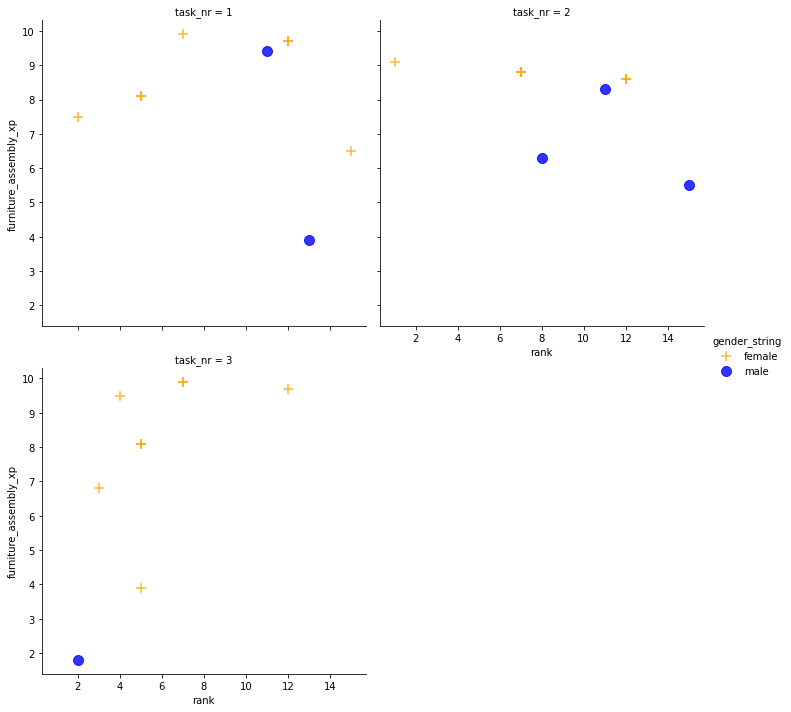

In [3]:
markers = ['+','o']
plot_data_0 = plot_data[(plot_data['ranking_type'] == 0)]
sns.lmplot("rank", "furniture_assembly_xp", data=plot_data_0, hue="gender_string",
           fit_reg=False, col='task_nr', col_wrap=2, markers=markers, scatter_kws={"s": 100}, palette=["orange", "blue"])
print("Dataset: Female Candidates with higher average Experience")

In [11]:
markers = ['o','+']
plot_data_1 = plot_data[(plot_data['ranking_type'] == 1)]

sns.lmplot("rank", "total_xp", data=plot_data_1, hue="gender_string", fit_reg=False, col='task_nr', col_wrap=2, markers=markers, scatter_kws={"s": 100})
print("Dataset: Male Candidates with higher average Experience")

ValueError: figure size must be positive finite not (10, 0)

In [ ]:
markers = ['+','o']
plot_data_2 = plot_data[(plot_data['ranking_type'] == 2)]
sns.lmplot("rank", "total_xp", data=plot_data_2, hue="gender_string", fit_reg=False, col='task_nr', col_wrap=2, markers=markers, scatter_kws={"s": 100}, palette=["orange", "blue"])
print("Dataset: Female Candidates with higher average Experience")

In [ ]:
plot_data_3 = plot_data[(plot_data['ranking_type'] == 2)]
sns.lmplot("rank", "total_xp", data=plot_data_3, hue="gender_string", fit_reg=False, col='task_nr', col_wrap=2)
print("Dataset: Male Candidates with higher average Experience")

In [ ]:
plot_data = get_selected_candidates_experience_gender_rank_task_rankingtype(data_table)
plot_data.insert(8, "gender_string", plot_data["gender"].map(lambda x: 'female' if x==0 else 'male'))
plot_data_0 = plot_data[(plot_data['ranking_type'] == 2)]
plot_data_1 = plot_data[(plot_data['ranking_type'] == 3)]
plot_data_t1f = plot_data_0[(plot_data_0['task_nr'] == 1)]
plot_data_t1m = plot_data_1[(plot_data_1['task_nr'] == 1)]
#sns.lmplot("rank", "total_xp", data=plot_data_3, hue="gender_string", fit_reg=False, col='task_nr', col_wrap=2)
sns.relplot(x="rank", y="total_xp", hue="uId", style="gender_string",
            data=plot_data_t1f, s=100);
sns.relplot(x="rank", y="total_xp", hue="uId", style="gender_string",
            data=plot_data_t1m, s=100);
print("RANKING SORTED, TASK 1 IS GENDER INDIFFERENT")
print("Dataset task 1 rt2 sorted: Female Candidates with higher average Experience")
print("Dataset task 1 rt3 sorted: Male Candidates with higher average Experience")



In [ ]:
plot_data = get_selected_candidates_experience_gender_rank_task_rankingtype(data_table)
plot_data.insert(8, "gender_string", plot_data["gender"].map(lambda x: 'female' if x==0 else 'male'))
plot_data_0 = plot_data[(plot_data['ranking_type'] == 2)]
plot_data_1 = plot_data[(plot_data['ranking_type'] == 3)]
plot_data_t1f = plot_data_0[(plot_data_0['task_nr'] == 2)]
plot_data_t1m = plot_data_1[(plot_data_1['task_nr'] == 2)]
#sns.lmplot("rank", "total_xp", data=plot_data_3, hue="gender_string", fit_reg=False, col='task_nr', col_wrap=2)
sns.relplot(x="rank", y="total_xp", hue="uId", style="gender_string",
            data=plot_data_t1f, s=100);
sns.lmplot("rank", "total_xp", data=plot_data_t1f, hue="gender_string", fit_reg=False, col='uId', col_wrap=2)
sns.relplot(x="rank", y="total_xp", hue="uId", style="gender_string",
            data=plot_data_t1m, s=100);
sns.lmplot("rank", "total_xp", data=plot_data_t1m, hue="gender_string", fit_reg=False, col='uId', col_wrap=2)
print("RANKING SORTED, SAME TASK IS GENDER INDIFFERENT")
print("Dataset task 2 rt2 sorted: Female Candidates with higher average Experience")
print("Dataset task 2 rt3 sorted: Male Candidates with higher average Experience")



In [ ]:
plot_data = get_selected_candidates_experience_gender_rank_task_rankingtype(data_table)
plot_data.insert(8, "gender_string", plot_data["gender"].map(lambda x: 'female' if x==0 else 'male'))
plot_data_0 = plot_data[(plot_data['ranking_type'] == 2)]
plot_data_1 = plot_data[(plot_data['ranking_type'] == 3)]
plot_data_t1f = plot_data_0[(plot_data_0['task_nr'] == 3)]
plot_data_t1m = plot_data_1[(plot_data_1['task_nr'] == 3)]
#sns.lmplot("rank", "total_xp", data=plot_data_3, hue="gender_string", fit_reg=False, col='task_nr', col_wrap=2)
sns.relplot(x="rank", y="total_xp", hue="uId", style="gender_string",
            data=plot_data_t1f, s=100);
#sns.lmplot("rank", "total_xp", data=plot_data_t1f, hue="gender_string", fit_reg=False, col='uId', col_wrap=2) 
plt.xlim(0,21)
plt.ylim(0,20)
sns.relplot(x="rank", y="total_xp", hue="uId", style="gender_string",
            data=plot_data_t1m, s=100);
plt.xlim(0,21)
plt.ylim(0,20)
#sns.lmplot("rank", "total_xp", data=plot_data_t1m, hue="gender_string", fit_reg=False, col='uId', col_wrap=2) 
print("RANKING SORTED, No Information about Task, user decisions are close ")
print("Dataset task 3 rt2 sorted: Female Candidates with higher average Experience")
print("Dataset task 3 rt3 sorted: Male Candidates with higher average Experience")

RANKING NOT SORTED, No Information about Task, user decisions are close 
Dataset task 1 rt0 sorted: Female Candidates with higher average Experience
Dataset task 1 rt1 sorted: Male Candidates with higher average Experience


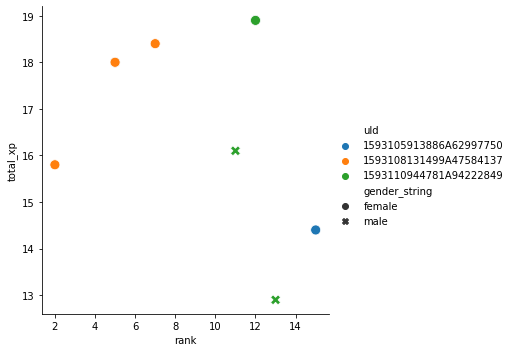

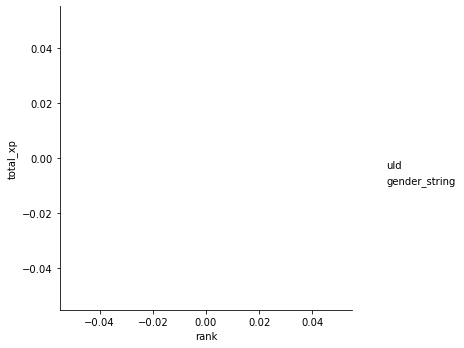

In [8]:
plot_data = get_selected_candidates_experience_gender_rank_task_rankingtype(data_table)
plot_data.insert(8, "gender_string", plot_data["gender"].map(lambda x: 'female' if x==0 else 'male'))
plot_data_0 = plot_data[(plot_data['ranking_type'] == 0)]
plot_data_1 = plot_data[(plot_data['ranking_type'] == 1)]
plot_data_t1f = plot_data_0[(plot_data_0['task_nr'] == 1)]
plot_data_t1m = plot_data_1[(plot_data_1['task_nr'] == 1)]
#sns.lmplot("rank", "total_xp", data=plot_data_3, hue="gender_string", fit_reg=False, col='task_nr', col_wrap=2)
sns.relplot(x="rank", y="total_xp", hue="uId", style="gender_string",
            data=plot_data_t1f, s=100);
#sns.lmplot("rank", "total_xp", data=plot_data_t1f, hue="gender_string", fit_reg=False, col='uId', col_wrap=2) 
sns.relplot(x="rank", y="total_xp", hue="uId", style="gender_string",
            data=plot_data_t1m, s=100);
#sns.lmplot("rank", "total_xp", data=plot_data_t1m, hue="gender_string", fit_reg=False, col='uId', col_wrap=2) 
print("RANKING NOT SORTED, No Information about Task, user decisions are close ")
print("Dataset task 1 rt0 sorted: Female Candidates with higher average Experience")
print("Dataset task 1 rt1 sorted: Male Candidates with higher average Experience")

In [6]:
print("TASK 1")
print("Ranking type 0: female dom, not sorted")
distribution_by_task = get_ranking_with_selected_count_by_rank_and_ranking_type(0)
seen_female = distribution_by_task["1"]["female"]["seen"]
selected_female = distribution_by_task["1"]["female"]["selected"]
probs_female = [0.0]*20
for i in range(0,len(seen_female)):
    if seen_female[i] != 0:
        probs_female[i] = selected_female[i]/seen_female[i]
print("female: " +str(probs_female))

seen_male = distribution_by_task["1"]["male"]["seen"]
selected_male = distribution_by_task["1"]["male"]["selected"]
probs_male = [0.0]*20
for i in range(0,len(seen_male)):
    if seen_male[i] != 0:
        probs_male[i] = selected_male[i]/seen_male[i]
print("male:   "+str(probs_male))

print("Ranking type 1: male dom, not sorted")
distribution_by_task = get_ranking_with_selected_count_by_rank_and_ranking_type(1)
seen_female = distribution_by_task["1"]["female"]["seen"]
selected_female = distribution_by_task["1"]["female"]["selected"]
probs_female = [0.0]*20
for i in range(0,len(seen_female)):
    if seen_female[i] != 0:
        probs_female[i] = selected_female[i]/seen_female[i]
print("female: " +str(probs_female))

seen_male = distribution_by_task["1"]["male"]["seen"]
selected_male = distribution_by_task["1"]["male"]["selected"]
probs_male = [0.0]*20
for i in range(0,len(seen_male)):
    if seen_male[i] != 0:
        probs_male[i] = selected_male[i]/seen_male[i]
print("male:   "+str(probs_male))

print("Ranking type 2: female dom, sorted")
distribution_by_task = get_ranking_with_selected_count_by_rank_and_ranking_type(2)
seen_female = distribution_by_task["1"]["female"]["seen"]
selected_female = distribution_by_task["1"]["female"]["selected"]
probs_female = [0.0]*20
for i in range(0,len(seen_female)):
    if seen_female[i] != 0:
        probs_female[i] = selected_female[i]/seen_female[i]
print("female: " +str(probs_female))

seen_male = distribution_by_task["1"]["male"]["seen"]
selected_male = distribution_by_task["1"]["male"]["selected"]
probs_male = [0.0]*20
for i in range(0,len(seen_male)):
    if seen_male[i] != 0:
        probs_male[i] = selected_male[i]/seen_male[i]
print("male:   "+str(probs_male))

print("Ranking type 3: male dom, sorted")
distribution_by_task = get_ranking_with_selected_count_by_rank_and_ranking_type(3)
seen_female = distribution_by_task["1"]["female"]["seen"]
selected_female = distribution_by_task["1"]["female"]["selected"]
probs_female = [0.0]*20
for i in range(0,len(seen_female)):
    if seen_female[i] != 0:
        probs_female[i] = selected_female[i]/seen_female[i]
print("female: " +str(probs_female))

seen_male = distribution_by_task["1"]["male"]["seen"]
selected_male = distribution_by_task["1"]["male"]["selected"]
probs_male = [0.0]*20
for i in range(0,len(seen_male)):
    if seen_male[i] != 0:
        probs_male[i] = selected_male[i]/seen_male[i]
print("male:   "+str(probs_male))


print("---------------------------------------------")
print("TASK 2")
print("Ranking type 0: female dom, not sorted")
distribution_by_task = get_ranking_with_selected_count_by_rank_and_ranking_type(0)
seen_female = distribution_by_task["2"]["female"]["seen"]
selected_female = distribution_by_task["2"]["female"]["selected"]
probs_female = [0.0]*20
for i in range(0,len(seen_female)):
    if seen_female[i] != 0:
        probs_female[i] = selected_female[i]/seen_female[i]
print("female: " +str(probs_female))

seen_male = distribution_by_task["2"]["male"]["seen"]
selected_male = distribution_by_task["2"]["male"]["selected"]
probs_male = [0.0]*20
for i in range(0,len(seen_male)):
    if seen_male[i] != 0:
        probs_male[i] = selected_male[i]/seen_male[i]
print("male:   "+str(probs_male))

print("Ranking type 1: male dom, not sorted")
distribution_by_task = get_ranking_with_selected_count_by_rank_and_ranking_type(1)
seen_female = distribution_by_task["2"]["female"]["seen"]
selected_female = distribution_by_task["2"]["female"]["selected"]
probs_female = [0.0]*20
for i in range(0,len(seen_female)):
    if seen_female[i] != 0:
        probs_female[i] = selected_female[i]/seen_female[i]
print("female: " +str(probs_female))

seen_male = distribution_by_task["2"]["male"]["seen"]
selected_male = distribution_by_task["2"]["male"]["selected"]
probs_male = [0.0]*20
for i in range(0,len(seen_male)):
    if seen_male[i] != 0:
        probs_male[i] = selected_male[i]/seen_male[i]
print("male:   "+str(probs_male))

print("Ranking type 2: female dom, sorted")
distribution_by_task = get_ranking_with_selected_count_by_rank_and_ranking_type(2)
seen_female = distribution_by_task["2"]["female"]["seen"]
selected_female = distribution_by_task["2"]["female"]["selected"]
probs_female = [0.0]*20
for i in range(0,len(seen_female)):
    if seen_female[i] != 0:
        probs_female[i] = selected_female[i]/seen_female[i]
print("female: " +str(probs_female))

seen_male = distribution_by_task["2"]["male"]["seen"]
selected_male = distribution_by_task["2"]["male"]["selected"]
probs_male = [0.0]*20
for i in range(0,len(seen_male)):
    if seen_male[i] != 0:
        probs_male[i] = selected_male[i]/seen_male[i]
print("male:   "+str(probs_male))

print("Ranking type 3: male dom, sorted")
distribution_by_task = get_ranking_with_selected_count_by_rank_and_ranking_type(3)
seen_female = distribution_by_task["2"]["female"]["seen"]
selected_female = distribution_by_task["2"]["female"]["selected"]
probs_female = [0.0]*20
for i in range(0,len(seen_female)):
    if seen_female[i] != 0:
        probs_female[i] = selected_female[i]/seen_female[i]
print("female: " +str(probs_female))

seen_male = distribution_by_task["2"]["male"]["seen"]
selected_male = distribution_by_task["2"]["male"]["selected"]
probs_male = [0.0]*20
for i in range(0,len(seen_male)):
    if seen_male[i] != 0:
        probs_male[i] = selected_male[i]/seen_male[i]
print("male:   "+str(probs_male))


print("---------------------------------------------")
print("TASK 3")
print("Ranking type 0: female dom, not sorted")
distribution_by_task = get_ranking_with_selected_count_by_rank_and_ranking_type(0)
seen_female = distribution_by_task["3"]["female"]["seen"]
selected_female = distribution_by_task["3"]["female"]["selected"]
probs_female = [0.0]*20
for i in range(0,len(seen_female)):
    if seen_female[i] != 0:
        probs_female[i] = selected_female[i]/seen_female[i]
print("female: " +str(probs_female))

seen_male = distribution_by_task["3"]["male"]["seen"]
selected_male = distribution_by_task["3"]["male"]["selected"]
probs_male = [0.0]*20
for i in range(0,len(seen_male)):
    if seen_male[i] != 0:
        probs_male[i] = selected_male[i]/seen_male[i]
print("male:   "+str(probs_male))

print("Ranking type 1: male dom, not sorted")
distribution_by_task = get_ranking_with_selected_count_by_rank_and_ranking_type(1)
seen_female = distribution_by_task["3"]["female"]["seen"]
selected_female = distribution_by_task["3"]["female"]["selected"]
probs_female = [0.0]*20
for i in range(0,len(seen_female)):
    if seen_female[i] != 0:
        probs_female[i] = selected_female[i]/seen_female[i]
print("female: " +str(probs_female))

seen_male = distribution_by_task["3"]["male"]["seen"]
selected_male = distribution_by_task["3"]["male"]["selected"]
probs_male = [0.0]*20
for i in range(0,len(seen_male)):
    if seen_male[i] != 0:
        probs_male[i] = selected_male[i]/seen_male[i]
print("male:   "+str(probs_male))

print("Ranking type 2: female dom, sorted")
distribution_by_task = get_ranking_with_selected_count_by_rank_and_ranking_type(2)
seen_female = distribution_by_task["3"]["female"]["seen"]
selected_female = distribution_by_task["3"]["female"]["selected"]
probs_female = [0.0]*20
for i in range(0,len(seen_female)):
    if seen_female[i] != 0:
        probs_female[i] = selected_female[i]/seen_female[i]
print("female: " +str(probs_female))

seen_male = distribution_by_task["3"]["male"]["seen"]
selected_male = distribution_by_task["3"]["male"]["selected"]
probs_male = [0.0]*20
for i in range(0,len(seen_male)):
    if seen_male[i] != 0:
        probs_male[i] = selected_male[i]/seen_male[i]
print("male:   "+str(probs_male))

print("Ranking type 3: male dom, sorted")
distribution_by_task = get_ranking_with_selected_count_by_rank_and_ranking_type(3)
seen_female = distribution_by_task["3"]["female"]["seen"]
selected_female = distribution_by_task["3"]["female"]["selected"]
probs_female = [0.0]*20
for i in range(0,len(seen_female)):
    if seen_female[i] != 0:
        probs_female[i] = selected_female[i]/seen_female[i]
print("female: " +str(probs_female))

seen_male = distribution_by_task["3"]["male"]["seen"]
selected_male = distribution_by_task["3"]["male"]["selected"]
probs_male = [0.0]*20
for i in range(0,len(seen_male)):
    if seen_male[i] != 0:
        probs_male[i] = selected_male[i]/seen_male[i]
print("male:   "+str(probs_male))

TASK 1
Ranking type 0: female dom, not sorted
female: [0.0, 0.3333333333333333, 0.0, 0.0, 0.6666666666666666, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.6666666666666666, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0]
male:   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Ranking type 1: male dom, not sorted
female: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
male:   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Ranking type 2: female dom, sorted
female: [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
male:   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
Ranking type 3: male dom, sorted
female: [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

In [1]:
print("---------------------------------------------")
print("All Tasks")
print("Ranking type 0: female dom, not sorted")
distribution_by_task = get_ranking_with_selected_count_by_rank_and_ranking_type(0)
seen_female = np.array(distribution_by_task["1"]["female"]["seen"]) + np.array(distribution_by_task["2"]["female"]["seen"]) + np.array(distribution_by_task["2"]["female"]["seen"])
selected_female = np.array(distribution_by_task["1"]["female"]["selected"]) + np.array(distribution_by_task["2"]["female"]["selected"]) + np.array(distribution_by_task["3"]["female"]["selected"])
probs_female = [0.0]*20
for i in range(0,len(seen_female)):
    if seen_female[i] != 0:
        probs_female[i] = selected_female[i]/seen_female[i]
print("female: " +str(probs_female))

seen_male = np.array(distribution_by_task["1"]["male"]["seen"]) + np.array(distribution_by_task["2"]["male"]["seen"]) + np.array(distribution_by_task["3"]["male"]["seen"])
selected_male = np.array(distribution_by_task["3"]["male"]["selected"]) + np.array(distribution_by_task["2"]["male"]["selected"]) + np.array(distribution_by_task["3"]["male"]["selected"])
probs_male = [0.0]*20
for i in range(0,len(seen_male)):
    if seen_male[i] != 0:
        probs_male[i] = selected_male[i]/seen_male[i]
print("male:   "+str(probs_male))

plt.plot(probs_female)
plt.show()

plt.plot(probs_male)
plt.show()
print("Ranking type 1: male dom, not sorted")
distribution_by_task = get_ranking_with_selected_count_by_rank_and_ranking_type(1)
seen_female = np.array(distribution_by_task["1"]["female"]["seen"]) + np.array(distribution_by_task["2"]["female"]["seen"]) + np.array(distribution_by_task["2"]["female"]["seen"])
selected_female = np.array(distribution_by_task["1"]["female"]["selected"]) + np.array(distribution_by_task["2"]["female"]["selected"]) + np.array(distribution_by_task["3"]["female"]["selected"])
probs_female = [0.0]*20
for i in range(0,len(seen_female)):
    if seen_female[i] != 0:
        probs_female[i] = selected_female[i]/seen_female[i]
print("female: " +str(probs_female))

seen_male = np.array(distribution_by_task["1"]["male"]["seen"]) + np.array(distribution_by_task["2"]["male"]["seen"]) + np.array(distribution_by_task["3"]["male"]["seen"])
selected_male = np.array(distribution_by_task["1"]["male"]["selected"]) + np.array(distribution_by_task["2"]["male"]["selected"]) + np.array(distribution_by_task["3"]["male"]["selected"])
probs_male = [0.0]*20
for i in range(0,len(seen_male)):
    if seen_male[i] != 0:
        probs_male[i] = selected_male[i]/seen_male[i]
print("male:   "+str(probs_male))

plt.plot(probs_female)
plt.show()
plt.plot(probs_male)
plt.show()
print("Ranking type 3: male dom, sorted")
distribution_by_task = get_ranking_with_selected_count_by_rank_and_ranking_type(3)
seen_female = np.array(distribution_by_task["1"]["female"]["seen"]) + np.array(distribution_by_task["2"]["female"]["seen"]) + np.array(distribution_by_task["3"]["female"]["seen"])
selected_female = np.array(distribution_by_task["1"]["female"]["selected"]) + np.array(distribution_by_task["2"]["female"]["selected"]) + np.array(distribution_by_task["3"]["female"]["selected"])
probs_female = [0.0]*20
for i in range(0,len(seen_female)):
    if seen_female[i] != 0:
        probs_female[i] = selected_female[i]/seen_female[i]
print("female: " +str(probs_female))

seen_male = np.array(distribution_by_task["1"]["male"]["seen"]) + np.array(distribution_by_task["2"]["male"]["seen"]) + np.array(distribution_by_task["3"]["male"]["seen"])
selected_male = np.array(distribution_by_task["1"]["male"]["selected"]) + np.array(distribution_by_task["2"]["male"]["selected"]) + np.array(distribution_by_task["3"]["male"]["selected"])
probs_male = [0.0]*20
for i in range(0,len(seen_male)):
    if seen_male[i] != 0:
        probs_male[i] = selected_male[i]/seen_male[i]
print("male:   "+str(probs_male))
plt.plot(probs_female)
plt.show()
plt.plot(probs_male)
plt.show()

---------------------------------------------
All Tasks
Ranking type 0: female dom, not sorted


NameError: name 'get_ranking_with_selected_count_by_rank_and_ranking_type' is not defined